In [1]:
import torch
from torchvision import datasets
from torchvision import transforms
import matplotlib.pyplot as plt

In [2]:
data_path = r'C:\Users\ian\Desktop\dlwpt-code-master\dlwpt-code-master\p1ch7'
cifar10 = datasets.CIFAR10(data_path, train = True, download = True)

Files already downloaded and verified


In [3]:
cifar10_val = datasets.CIFAR10(data_path, train = False, download = True)

Files already downloaded and verified


In [4]:
type(cifar10).__mro__

(torchvision.datasets.cifar.CIFAR10,
 torchvision.datasets.vision.VisionDataset,
 torch.utils.data.dataset.Dataset,
 typing.Generic,
 object)

In [5]:
len(cifar10)

50000

In [6]:
cifar10.__getitem__

<bound method CIFAR10.__getitem__ of Dataset CIFAR10
    Number of datapoints: 50000
    Root location: C:\Users\ian\Desktop\dlwpt-code-master\dlwpt-code-master\p1ch7
    Split: Train>

In [7]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
img, label = cifar10[99]

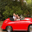

In [8]:
img

In [9]:
label

1

In [10]:
dir(transforms)

['AutoAugment',
 'AutoAugmentPolicy',
 'CenterCrop',
 'ColorJitter',
 'Compose',
 'ConvertImageDtype',
 'FiveCrop',
 'GaussianBlur',
 'Grayscale',
 'InterpolationMode',
 'Lambda',
 'LinearTransformation',
 'Normalize',
 'PILToTensor',
 'Pad',
 'RandAugment',
 'RandomAdjustSharpness',
 'RandomAffine',
 'RandomApply',
 'RandomAutocontrast',
 'RandomChoice',
 'RandomCrop',
 'RandomEqualize',
 'RandomErasing',
 'RandomGrayscale',
 'RandomHorizontalFlip',
 'RandomInvert',
 'RandomOrder',
 'RandomPerspective',
 'RandomPosterize',
 'RandomResizedCrop',
 'RandomRotation',
 'RandomSizedCrop',
 'RandomSolarize',
 'RandomVerticalFlip',
 'Resize',
 'Scale',
 'TenCrop',
 'ToPILImage',
 'ToTensor',
 'TrivialAugmentWide',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'autoaugment',
 'functional',
 'functional_pil',
 'functional_tensor',
 'transforms']

In [11]:
to_tensor = transforms.ToTensor()

In [12]:
img_t = to_tensor(img)

In [13]:
img_t.shape

torch.Size([3, 32, 32])

In [14]:
tensor_cifar10 = datasets.CIFAR10(data_path, train = True, download = False, transform = transforms.ToTensor())

In [15]:
img_t, _ = tensor_cifar10[99]
type(img_t)

torch.Tensor

In [16]:
img_t.shape, img_t.dtype

(torch.Size([3, 32, 32]), torch.float32)

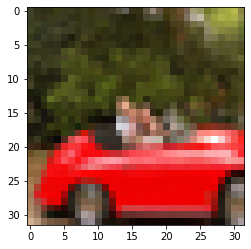

In [17]:
plt.imshow(img_t.permute(1,2,0))

In [18]:
imgs = torch.stack([img_t for img_t, _ in tensor_cifar10], dim = 3)

In [19]:
[img_t for img_t, _ in tensor_cifar10]

[tensor([[[0.2314, 0.1686, 0.1961,  ..., 0.6196, 0.5961, 0.5804],
          [0.0627, 0.0000, 0.0706,  ..., 0.4824, 0.4667, 0.4784],
          [0.0980, 0.0627, 0.1922,  ..., 0.4627, 0.4706, 0.4275],
          ...,
          [0.8157, 0.7882, 0.7765,  ..., 0.6275, 0.2196, 0.2078],
          [0.7059, 0.6784, 0.7294,  ..., 0.7216, 0.3804, 0.3255],
          [0.6941, 0.6588, 0.7020,  ..., 0.8471, 0.5922, 0.4824]],
 
         [[0.2431, 0.1804, 0.1882,  ..., 0.5176, 0.4902, 0.4863],
          [0.0784, 0.0000, 0.0314,  ..., 0.3451, 0.3255, 0.3412],
          [0.0941, 0.0275, 0.1059,  ..., 0.3294, 0.3294, 0.2863],
          ...,
          [0.6667, 0.6000, 0.6314,  ..., 0.5216, 0.1216, 0.1333],
          [0.5451, 0.4824, 0.5647,  ..., 0.5804, 0.2431, 0.2078],
          [0.5647, 0.5059, 0.5569,  ..., 0.7216, 0.4627, 0.3608]],
 
         [[0.2471, 0.1765, 0.1686,  ..., 0.4235, 0.4000, 0.4039],
          [0.0784, 0.0000, 0.0000,  ..., 0.2157, 0.1961, 0.2235],
          [0.0824, 0.0000, 0.0314,  ...,

In [20]:
imgs.shape

torch.Size([3, 32, 32, 50000])

In [21]:
imgs.view(3, -1).mean(dim = 1)

tensor([0.4914, 0.4822, 0.4465])

In [22]:
imgs.view(3, -1).std(dim = 1)

tensor([0.2470, 0.2435, 0.2616])

In [23]:
transformed_cifar10 = datasets.CIFAR10(data_path, train = True, download = False, transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4915, 0.4823, 0.4468),
                        (0.247, 0.2435, 0.2616))
]))
cifar10_val =  datasets.CIFAR10(data_path, train = False, download = False, transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4915, 0.4823, 0.4468),
                        (0.247, 0.2435, 0.2616))
]))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


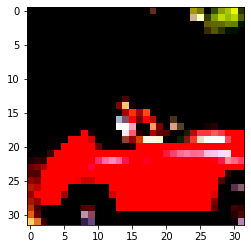

In [24]:
img_t, _ = transformed_cifar10[99]
plt.imshow(img_t.permute(1, 2, 0))
plt.show()

In [25]:
label_map = {0: 0, 2: 1}
class_name = ['airplane', 'bird']
cifar2 = [(img, label_map[label]) for img, label in transformed_cifar10 if label in [0, 2]]
cifar2_val = [(img, label_map[label]) for img, label in cifar10_val if label in [0, 2]]

In [26]:
import torch.nn as nn

In [27]:
n_out = 2
model = nn.Sequential(nn.Linear(3072, 512,),
                     nn.Tanh(),
                     nn.Linear(512, n_out))

In [28]:
def softmax(x):
    return torch.exp(x) / torch.exp(x).sum()

In [29]:
x = torch.tensor([1.0, 2.0, 3.0])

In [30]:
softmax(x)

tensor([0.0900, 0.2447, 0.6652])

In [31]:
softmax = nn.Softmax(dim = 1)
x = torch.tensor([[1.0,2.0,3.0],
                [1.0,2.0,3.0]])
softmax(x)

tensor([[0.0900, 0.2447, 0.6652],
        [0.0900, 0.2447, 0.6652]])

In [32]:
model = nn.Sequential(nn.Linear(3072, 512), nn.Tanh(),
                     nn.Linear(512, 2), nn.Softmax(dim = 1))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


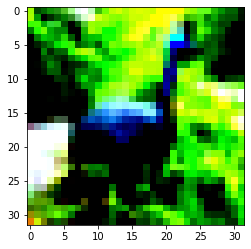

In [33]:
img, _ = cifar2[0]
plt.imshow(img.permute(1,2,0))
plt.show()

In [34]:
img_batch = img.view(-1).unsqueeze(0)

In [35]:
out = model(img_batch)
out

tensor([[0.5325, 0.4675]], grad_fn=<SoftmaxBackward0>)

In [36]:
_, index = torch.max(out, dim = 1)
index

tensor([0])

In [37]:
model = nn.Sequential(nn.Linear(3072, 512),
                      nn.Tanh(),
                      nn.Linear(512, 2),
                      nn.LogSoftmax(dim = 1))

In [38]:
loss = nn.NLLLoss()

In [39]:
out = model(img.view(-1).unsqueeze(0))
loss(out, torch.tensor([label]))

tensor(0.5977, grad_fn=<NllLossBackward0>)

In [72]:
model = nn.Sequential(nn.Linear(3072, 512),
                      nn.Tanh(),
                      nn.Linear(512, 2),
                      nn.LogSoftmax(dim = 1))
learning_rate = 1e-2
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)
loss_fn = nn.NLLLoss()
n_epochs = 100
for epoch in range(n_epochs):
    for img, label in cifar2:
        out = model(img.view(-1).unsqueeze(0))
        loss = loss_fn(out, torch.tensor([label]))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print('Epoch: %d, Loss: %f' %(epoch, float(loss)))

Epoch: 0, Loss: 6.411405
Epoch: 1, Loss: 5.189845
Epoch: 2, Loss: 3.110558
Epoch: 3, Loss: 5.371959
Epoch: 4, Loss: 1.583988
Epoch: 5, Loss: 5.484011
Epoch: 6, Loss: 8.803156
Epoch: 7, Loss: 12.798078
Epoch: 8, Loss: 7.265720
Epoch: 9, Loss: 8.118496
Epoch: 10, Loss: 7.393803
Epoch: 11, Loss: 8.256504
Epoch: 12, Loss: 6.881315
Epoch: 13, Loss: 4.130447
Epoch: 14, Loss: 3.220400
Epoch: 15, Loss: 7.136537
Epoch: 16, Loss: 13.062569
Epoch: 17, Loss: 10.272942
Epoch: 18, Loss: 4.400815
Epoch: 19, Loss: 1.722282
Epoch: 20, Loss: 3.374341
Epoch: 21, Loss: 0.966630
Epoch: 22, Loss: 14.598912
Epoch: 23, Loss: 10.863192
Epoch: 24, Loss: 6.316000
Epoch: 25, Loss: 6.246056
Epoch: 26, Loss: 5.634443
Epoch: 27, Loss: 4.892881
Epoch: 28, Loss: 6.710955
Epoch: 29, Loss: 2.432974
Epoch: 30, Loss: 6.827337
Epoch: 31, Loss: 2.514075
Epoch: 32, Loss: 3.047415
Epoch: 33, Loss: 2.619509
Epoch: 34, Loss: 8.796716
Epoch: 35, Loss: 3.343774
Epoch: 36, Loss: 5.384014
Epoch: 37, Loss: 0.019831
Epoch: 38, Loss: 

In [40]:
img.view(-1).unsqueeze(0)

tensor([[ 0.6139, -0.3228, -0.1164,  ..., -1.2732, -1.3182, -1.0484]])

In [41]:
img.view(-1).unsqueeze(0)

tensor([[ 0.6139, -0.3228, -0.1164,  ..., -1.2732, -1.3182, -1.0484]])

In [42]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size = 64, shuffle = True)

In [55]:
model = nn.Sequential(nn.Linear(3072, 512),
                      nn.Tanh(),
                      nn.Linear(512, 2),
                      nn.LogSoftmax(dim = 1))
learning_rate = 1e-2
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)
loss_fn = nn.NLLLoss()
n_epochs = 100
for epoch in range(n_epochs):
    train_loader = torch.utils.data.DataLoader(cifar2, batch_size = 64, shuffle = True)
    for imgs, label in train_loader:
        batch_size = imgs.shape[0]
        outputs = model(imgs.view(batch_size, -1))
        loss = loss_fn(outputs, torch.tensor(label))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print('Epoch: %d, Loss: %f' %(epoch, float(loss)))

<ipython-input-55-db3a8d8a6987>:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  loss = loss_fn(outputs, torch.tensor(label))


Epoch: 0, Loss: 0.423503
Epoch: 1, Loss: 0.288574
Epoch: 2, Loss: 0.443675
Epoch: 3, Loss: 0.437175
Epoch: 4, Loss: 0.236484
Epoch: 5, Loss: 0.518139
Epoch: 6, Loss: 0.748695
Epoch: 7, Loss: 0.467763
Epoch: 8, Loss: 0.588241
Epoch: 9, Loss: 0.472152
Epoch: 10, Loss: 0.295162
Epoch: 11, Loss: 0.395138
Epoch: 12, Loss: 0.303509
Epoch: 13, Loss: 0.287120
Epoch: 14, Loss: 0.322660
Epoch: 15, Loss: 0.302099
Epoch: 16, Loss: 0.278757
Epoch: 17, Loss: 0.354128
Epoch: 18, Loss: 0.291342
Epoch: 19, Loss: 0.341338
Epoch: 20, Loss: 0.102736
Epoch: 21, Loss: 0.265011
Epoch: 22, Loss: 0.251455
Epoch: 23, Loss: 0.137336
Epoch: 24, Loss: 0.256237
Epoch: 25, Loss: 0.150603
Epoch: 26, Loss: 0.207873
Epoch: 27, Loss: 0.211852
Epoch: 28, Loss: 0.119511
Epoch: 29, Loss: 0.147996
Epoch: 30, Loss: 0.256748
Epoch: 31, Loss: 0.091139
Epoch: 32, Loss: 0.219320
Epoch: 33, Loss: 0.154564
Epoch: 34, Loss: 0.084556
Epoch: 35, Loss: 0.280525
Epoch: 36, Loss: 0.190613
Epoch: 37, Loss: 0.211370
Epoch: 38, Loss: 0.470

In [52]:
label

tensor([0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
        1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1])

In [79]:
x= 0
for imgs, label in train_loader:
    x += 1
    

In [80]:
x

157

In [81]:
157*64

10048

In [82]:
len(cifar2)

10000

In [48]:
%who

NamespaceMagics	 batch_size	 cifar10	 cifar10_val	 cifar2	 cifar2_val	 class_name	 class_names	 data_path	 
datasets	 epoch	 get_ipython	 getsizeof	 img	 img_batch	 img_t	 imgs	 index	 
json	 label	 label_map	 learning_rate	 loss	 loss_fn	 model	 n_epochs	 n_out	 
nn	 np	 optimizer	 out	 plt	 softmax	 tensor_cifar10	 to_tensor	 torch	 
train_loader	 transformed_cifar10	 transforms	 var_dic_list	 x	 


In [49]:
import gc
gc.collect()

2903